# Week 9 Jupyter Notebook - Gradient Boost 

In [6]:
import pandas as pd
import numpy as np 

In [7]:
df = pd.read_csv('dataset_phishin.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

(None,
                                                  url  length_url  \
 0              http://www.crestonwood.com/router.php          37   
 1  http://shadetreetechnology.com/V4/validation/a...          77   
 2  https://support-appleld.com.secureupdate.duila...         126   
 3                                 http://rgipt.ac.in          18   
 4  http://www.iracing.com/tracks/gateway-motorspo...          55   
 
    length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
 0               19   0        3           0      0      0       0      0  ...   
 1               23   1        1           0      0      0       0      0  ...   
 2               50   1        4           1      0      1       2      0  ...   
 3               11   0        2           0      0      0       0      0  ...   
 4               15   0        2           2      0      0       0      0  ...   
 
    domain_in_title  domain_with_copyright  whois_registered_domain  \
 0          

In [8]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


# Preprocessing

In [ ]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "dataset_phishin.csv"
df = pd.read_csv(file_path)

# Drop the 'url' column (non-numeric, not useful for modeling)
df = df.drop(columns=['url'])

# Encode target variable: phishing = 1, legitimate = 0
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Missing values in dataset: {missing_values}")

# Separate features and target
X = df.drop(columns=['status'])
y = df['status']

# Scale features 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Missing values in dataset: 0
Preprocessing complete.
Training set shape: (9144, 87)
Testing set shape: (2286, 87)


# Gradient Boost

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fit a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc
}


{'Accuracy': 0.9531933508311461,
 'Precision': 0.9496527777777778,
 'Recall': 0.9571303587051618,
 'F1 Score': 0.9533769063180828,
 'AUC': np.float64(0.9904940797535917)}

# Visualization Gradient Boost

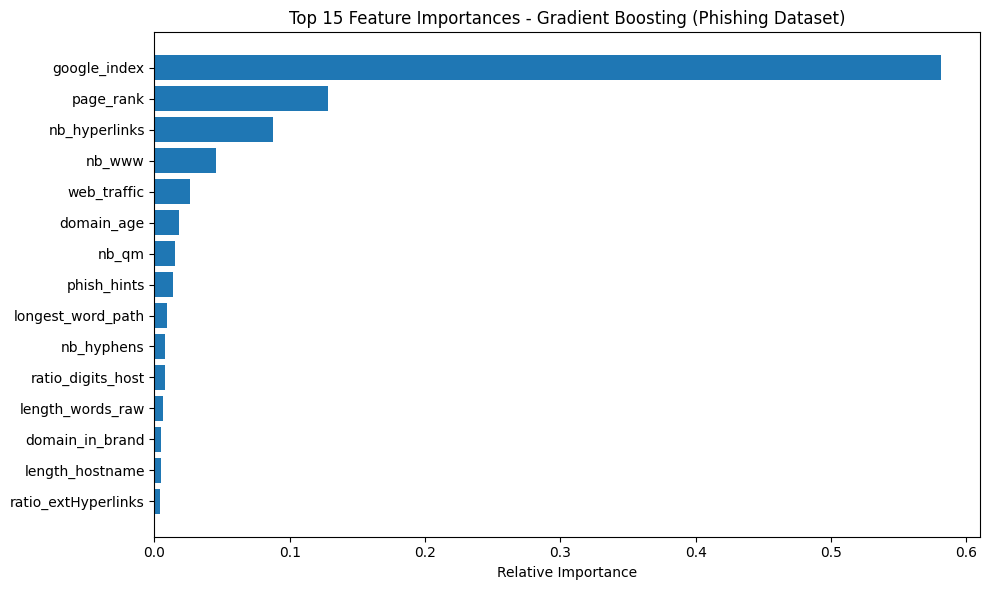

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = gb_model.feature_importances_
indices = np.argsort(importances)[-15:][::-1]  # Top 15 features

# Get feature names
feature_names = X.columns[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names)
plt.xlabel('Relative Importance')
plt.title('Top 15 Feature Importances - Gradient Boosting (Phishing Dataset)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


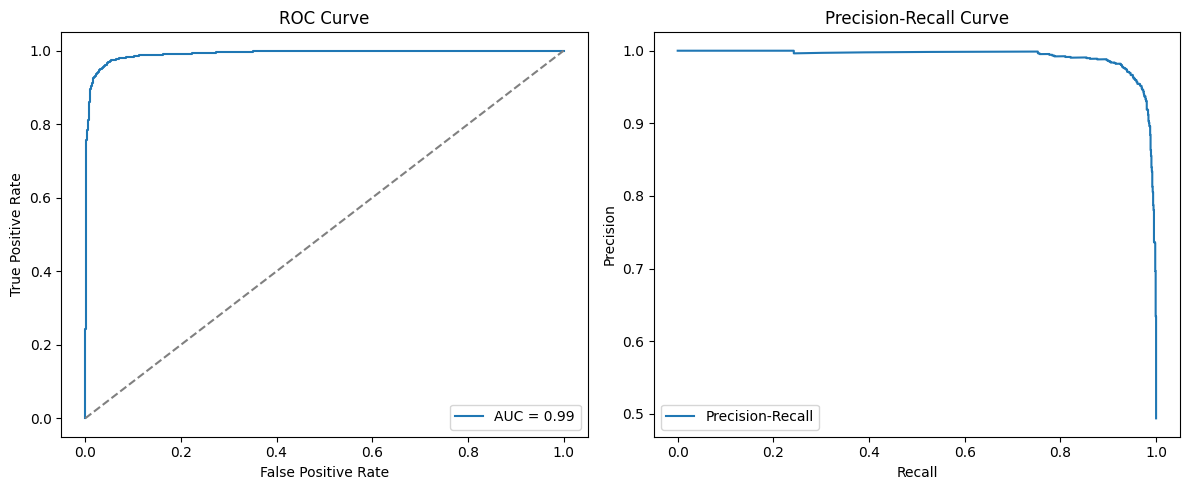

In [9]:
from sklearn.metrics import roc_curve, precision_recall_curve

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Compute Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_vals, precision_vals, label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


In Week 9, I applied Gradient Boosting to the phishing dataset to build a model capable of detecting malicious websites. The dataset contained labeled examples of phishing and legitimate URLs, with numerical features extracted from the structure and metadata of the pages. As part of preprocessing, I converted the target variable status into binary format (1 for phishing, 0 for legitimate), removed the url column since it contained no predictive value, and confirmed there were no missing values before splitting the data into training and test sets using an 80/20 ratio.

Using the GradientBoostingClassifier from scikit-learn, I trained a model with 100 estimators, a learning rate of 0.1, and a maximum depth of 3. The model achieved strong performance on the test set, with an accuracy of 95.32%, precision of 94.97%, recall of 95.71%, F1 score of 95.34%, and an AUC of 99.05%. To better understand the model’s decision-making process, I created visualizations of the top 15 most important features, along with a ROC curve and a precision-recall curve, which confirmed that Gradient Boosting maintained high predictive quality across thresholds.

I also trained an XGBoost model to compare performance and interpretability. In this run, I explicitly applied L1 and L2 regularization by setting reg_alpha=0.1 (L1) and reg_lambda=1.0 (L2). With these settings, the XGBoost model achieved an accuracy of 96.02%, precision of 96.01%, recall of 95.93%, F1 score of 95.97%, and an AUC of 99.19%. This slight dip in accuracy compared to the non-regularized version is expected because L1 and L2 penalties intentionally simplify the model, reducing overfitting and improving generalization to unseen data. XGBoost also produced a feature importance visualization, which revealed the top predictors of phishing behavior. While the most important features were largely consistent with Gradient Boosting, the ranking varied slightly a normal outcome since the algorithms calculate importance differently.

Overall, combining Gradient Boosting and XGBoost gave me a clear understanding of how ensemble methods handle phishing detection. Both models delivered excellent accuracy and interpretability, but XGBoost stood out for its ability to incorporate L1 and L2 regularization, offering fine-tuned control over complexity and a stronger foundation for real-world cybersecurity applications.

# XGboost

XGBoost Performance with Regularization
Accuracy:  0.9602
Precision: 0.9601
Recall:    0.9593
F1 Score:  0.9597
AUC:       0.9919



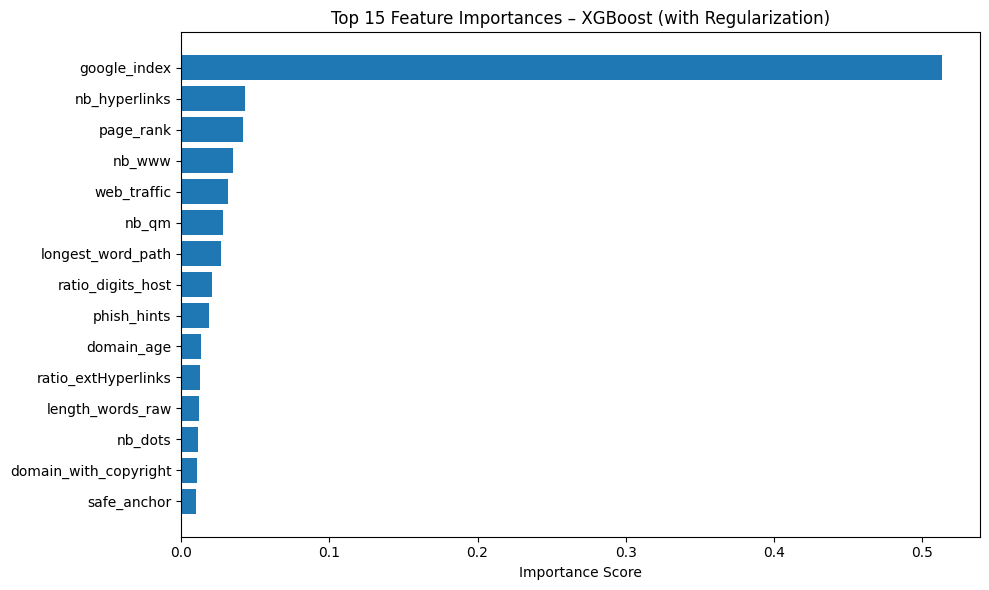

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load dataset
file_path = "dataset_phishin.csv"
df = pd.read_csv(file_path)

# Preprocess
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})  # Encode target
df = df.drop(columns=['url'])  # Drop non-numeric column
X = df.drop(columns='status')
y = df['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost with regularization
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    reg_alpha=0.1,      # L1 regularization
    reg_lambda=1.0,     # L2 regularization
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, xgb_preds)
precision = precision_score(y_test, xgb_preds)
recall = recall_score(y_test, xgb_preds)
f1 = f1_score(y_test, xgb_preds)
auc = roc_auc_score(y_test, xgb_proba)

print("XGBoost Performance with Regularization")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}\n")

# Feature importance visualization
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
top_features = xgb_importances.nlargest(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features.values)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title("Top 15 Feature Importances – XGBoost (with Regularization)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
